# Desafio SMARKIO

Para o desenvolvimento desse desafio, irei dividí-lo em cinco etapas:
* Obtenção dos Dados
* Exploração dos Dados
* Preparação dos Dados
* Modelagem
* Avaliação

## 1. Análise exploratória dos dados utilizando estatística descritiva e inferencial considerando uma, duas e/ou mais variáveis.

Para responder essa questão, o primeiro passo a se dar é importar as bibliotecas necessárias e carregar os datasets para dentro do notebook. 

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Carregando o dataset da primeira aba
xls = pd.ExcelFile('teste_smarkio_lbs.xls')
df1 = pd.read_excel(xls, sheet_name='Análise_ML')

In [3]:
# Visualizando se o dataset foi carregado corretamente
df1.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


In [4]:
# Visualizando uma análise estatística básica
df1.describe()

,Pred_class,probabilidade,True_class
count,643.000000,643.000000,181.000000
mean,52.712286,0.622436,38.574586
std,37.602068,0.266811,39.581017
min,2.000000,0.043858,0.000000
25%,12.000000,0.408017,0.000000
50%,59.000000,0.616809,24.000000
75%,81.000000,0.870083,74.000000
max,118.000000,1.000000,117.000000


Com a descrição dos dados acima, é possível definir o scopo das variáveis que tangem o problema. Sendo **'Pred_class'**, **'True_class'** e **'probabilidade'** definidas como variáveis quatitativas e **'status'** como variável qualitativa.

In [5]:
# Visualizando número de linhas e colunas
print('O número de colunas do dataset é:\t', df1.shape[1])
print('O numero de linhas do dataset é:\t', df1.shape[0])

O número de colunas do dataset é:	 4
O numero de linhas do dataset é:	 643


In [6]:
# Visualizando algumas informações importantes do dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


Foi possível observar até aqui, que a coluna **'True_class'**, possui alguns campos com dados nulos. Como dito no enunciado do desafio, esses campos nulos serão preenchidos com os valores correspondentes de **'Pred_class'**.

In [7]:
# Substituindo valores nulos em 'True_class' iguais a 'Pred_class'
df1['True_class'].fillna(df1['Pred_class'], inplace = True)

In [8]:
# Checando para confirmar o preenchimento
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     643 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


Nota-se, porém, que os valores da coluna **'True_class'** se apresentam como *float*, no entanto, podem ser apresentados como *int*.

In [9]:
# Transformando os valores da coluna 'True_class' para int
df1['True_class'] = df1['True_class'].astype(int)

In [10]:
# Descobrindo o que contém a coluna 'status'
df1['status'].value_counts()

approved    600
revision     43
Name: status, dtype: int64

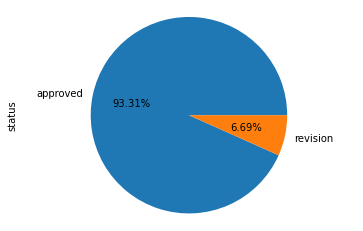

In [11]:
# Mostrando a porcentagem de valores em 'approved' e em 'revision'
df1.status.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.axis('equal');

Do gráfico acima, é possível concluir que a maioria (93,31%) dos dados estão como 'approved'.

Para facilitar uma possível identificação de igualdade entre as colunas **'True_class'** e **'Pred_class'**, criarei uma coluna chama **'success'**, com valores binários, sendo 1 para o caso de sucesso, ou seja, **'Pred_class'** é igual a **'True_class'** e 0 para o caso de não-sucesso, ou seja, **'Pred_class'** é diferente de **'True_class'**.

In [12]:
# Criando a coluna 'success'
df1['success'] = 'NaN'

for index, row in df1.iterrows():
    if row['Pred_class'] == row['True_class']:
        df1.loc[index, 'success'] = 1
    else:
        df1.loc[index, 'success'] = 0

Farei a mesma coisa para a coluna **'status'**, sendo 1 para *status* igual a 'approved' e 0 para *status* igual a 'revision'.

In [13]:
# Substituindo valores approved e reproved
df1['status'].replace(['approved', 'revision'], [1, 0], inplace = True)

In [14]:
# Verificando dataset
df1.head()

,Pred_class,probabilidade,status,True_class,success
0,2,0.079892,1,0,0
1,2,0.379377,1,74,0
2,2,0.379377,1,74,0
3,2,0.420930,1,74,0
4,2,0.607437,1,2,1


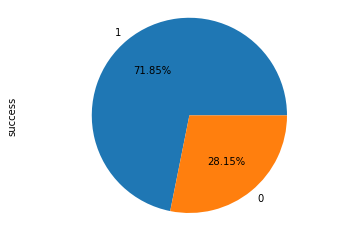

In [15]:
# Mostrando a porcentagem de acertos do modelo
df1.success.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.axis('equal');

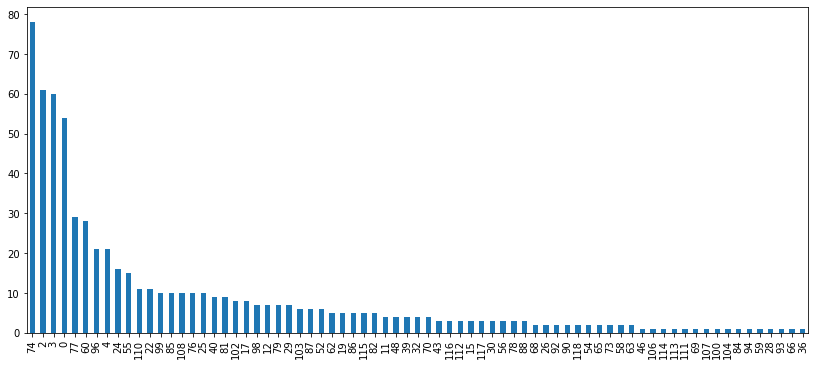

In [16]:
# Gráfico de frequência de 'True_class'
df1['True_class'].value_counts().plot(kind = 'bar', figsize = (14, 6));

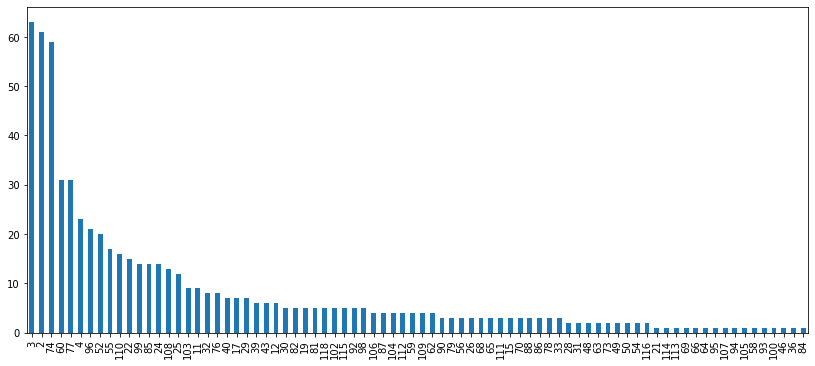

In [17]:
# Gráfico de frequência de 'Pred_class'
df1['Pred_class'].value_counts().plot(kind = 'bar', figsize = (14, 6));

Com a análise dos gráficos acima, é possível observar que a frequência das classes do dataset obedecem uma distribuição exponencial.

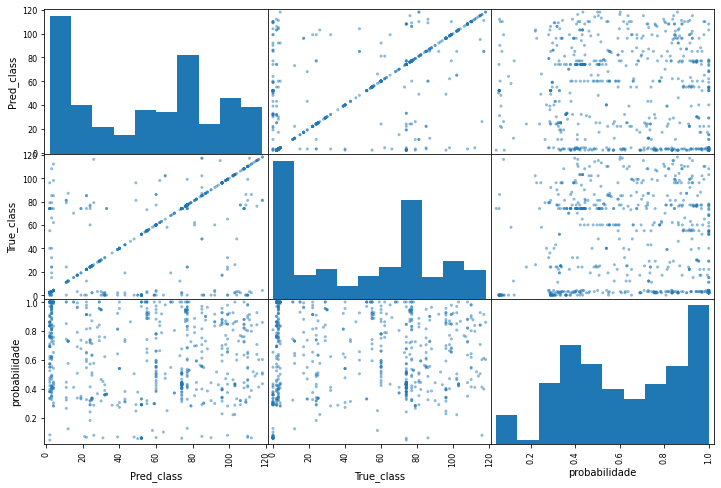

In [18]:
columns = ['Pred_class', 'True_class', 'probabilidade']
pd.plotting.scatter_matrix(df1[columns], figsize = (12, 8));

Não é possível concluir nada com o gráfico acima, pois os pontos não apresentam nenhum padrão que possa ser análisado.

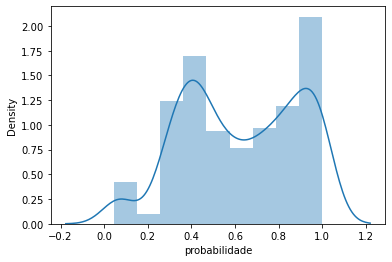

In [19]:
# Frequência da probabilidade
sns.distplot(df1['probabilidade']);

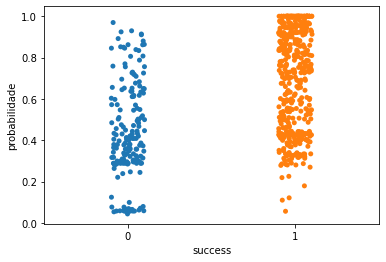

In [58]:
# Distribuição dos dados de probabilidade com a taxa de sucesso
sns.stripplot(x='success', y='probabilidade', data=df1);

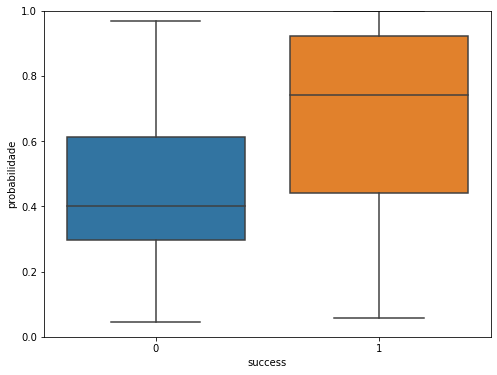

In [20]:
# Boxplot da probabilidade com a taxa de sucesso
var = 'success'
data = pd.concat([df1['probabilidade'], df1[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = 'probabilidade', data = data)
fig.axis(ymin = 0, ymax = 1);

In [21]:
# Média das probabilidades de acerto e erro
df1[['success', 'probabilidade']].groupby(['success']).mean()

,probabilidade
success,
0,0.435223
1,0.695781


Analisando os gráficos, é possível ver que o dataset possui bastante valores de probabilidade na casa dos 40% e também próximo a 90%. Também, é possível verificar que as maiores probabilidades tem sucesso entre acertar a classe predita com a classe verdadeira.

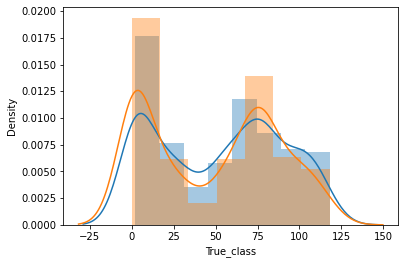

In [22]:
# Gráfico de frequência de 'True_class' e 'Pred_class'
sns.distplot(df1['Pred_class']);
sns.distplot(df1['True_class']);

Observando o gráfico de frequência acima, percebe-se que as classes tem aproximadamente as mesmas quantidades, sendo assim, o nível de acurácia do modelo aparenta ser razoável.

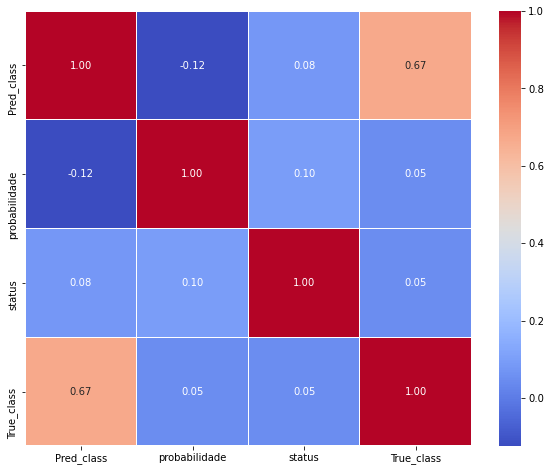

In [23]:
# Heatmap
corrmat = df1.corr()
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corrmat, cmap = 'coolwarm', fmt = '.2f', vmax = 1, linewidths = 0.1, linecolor = 'white', annot = True);

## 2. Calcule o desempenho do modelo de classificação utilizando pelo menos três métricas

Métricas que serão utilizadas:
* Acurácia;
* Precision;
* Recall;
* F1-score.

In [24]:
# Importando as bibliotecas necessárias para utilização das métricas
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score

In [25]:
# Definindo as colunas target e predicted
# cols = ['status', 'success', 'Pred_class']
target = df1['True_class'] # y_true
predicted = df1['Pred_class'] # y_pred

### Acurácia

In [26]:
# Calculando acurácia, apenas dividindo o numero de acertos pelo tamanho total do dataset
acertos = (df1['Pred_class'] == df1['True_class']).sum()
accuracy = (acertos / df1.shape[0]) * 100
print(f'Acurácia:\t{accuracy:.2f}%')

Acurácia:	71.85%


In [27]:
# Definindo acurácia do modelo pelo método accuracy_score do sklearn
accuracy = accuracy_score(target, predicted) * 100
print(f'Acurácia:\t{accuracy:.2f}%')

Acurácia:	71.85%


### Precisão

In [28]:
# Definindo precisão do modelo pelo método precision_score do sklearn
precision = precision_score(target, predicted, average = 'weighted') * 100
print(f'Precisão:\t{precision:.2f}%')

Precisão:	71.76%


### Recall

In [29]:
# Definindo recall do modelo pelo método recall_score do sklearn
recall = recall_score(target, predicted, average = 'weighted', zero_division = 'warn') * 100
print(f'Recall:\t\t{recall:.2f}%')

Recall:		71.85%


### F1-Score

In [30]:
# Definindo f1-score do modelo pelo método f1_score do sklearn
f1_score = f1_score(target, predicted, average = 'weighted', zero_division = 'warn') * 100
print(f'F1-Score:\t{f1_score:.2f}%')

F1-Score:	70.35%


Utilizando mais métricas para a comparação.

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [32]:
cols = ['status', 'success', 'Pred_class']
X = df1.drop(columns = cols, axis = 1)   #X = df1['True_class'].values.reshape(-1, 1) #df1.drop('success', axis = 1)
y = df1['success']
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(f'O dataset de treino possui {X_train.shape[0]} e o de teste possui {X_test.shape[0]}')

O dataset de treino possui 450 e o de teste possui 193


In [33]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict) * 100
print(f'A acuracia foi de {accuracy:.2f}%')

A acuracia foi de 80.83%


In [34]:
#Calculando a matriz de confusão
print (pd.crosstab(y_test, predict, rownames=['Real'], colnames=['Predict'], margins=True))

Predict   0    1  All
Real                 
0        13   32   45
1         5  143  148
All      18  175  193


In [35]:
# Mostrando o relatório de classificação
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.72      0.29      0.41        45
           1       0.82      0.97      0.89       148

    accuracy                           0.81       193
   macro avg       0.77      0.63      0.65       193
weighted avg       0.80      0.81      0.78       193



In [36]:
# Definindo a função de intervalo
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print(f'Acurácia média: {mean * 100:.2f}')
    print(f'Intervalo de acurácia: [{(mean - 2 * dv) * 100:.2f}% ~ {(mean + 2 * dv) * 100:.2f}]')

In [37]:
# Utilizando método KFold
cv = KFold(n_splits = 7, shuffle = True)

model = DecisionTreeClassifier(max_depth = 3)
results = cross_val_score(model, X_train, y_train, cv = cv)

intervalo(results)

Acurácia média: 79.10
Intervalo de acurácia: [72.79% ~ 85.41]


## 3. Crie um classificador que tenha como output se os dados com status igual a revision estão corretos ou não.

Será feito a separação dos dados que foram aprovados dos dados que estão em revisão.

### Separando dataset em treino e teste

Preparando dados para treino, de acordo com os dados que foram aprovados.

In [38]:
# Separando em dois datasets, os que foram aprovados e os que estão em revisão
df1_approved = df1[df1['status'] == 1] # treino
df1_revision = df1[df1['status'] == 0] # teste

In [39]:
# Verificando se o dataset foi carregado
df1_approved.head()

,Pred_class,probabilidade,status,True_class,success
0,2,0.079892,1,0,0
1,2,0.379377,1,74,0
2,2,0.379377,1,74,0
3,2,0.420930,1,74,0
4,2,0.607437,1,2,1


In [40]:
# Separando a variável target de treino
X_train = df1_approved['True_class'].values.reshape(-1, 1)
y_train = df1_approved['Pred_class']

In [41]:
# Aplicando o metódo KFold
cv = KFold(n_splits = 7, shuffle = True)
model = DecisionTreeClassifier(random_state = 2)
accuracy_scores = []

for train, test in cv.split(np.array(df1_approved)):
    model.fit(X_train[train], y_train[train])
    predict = model.predict(X_train[test])
    accuracy_scores.append(accuracy_score(predict, y_train[test]) * 100)

for i in range(len(accuracy_scores)):
    print(f'Treino {i + 1}:\n  Acurácia = {accuracy_scores[i]:.2f}%')
    
print(f'Média: {np.mean(accuracy_scores):.2f}')

Treino 1:
  Acurácia = 69.77%
Treino 2:
  Acurácia = 69.77%
Treino 3:
  Acurácia = 72.09%
Treino 4:
  Acurácia = 69.77%
Treino 5:
  Acurácia = 68.60%
Treino 6:
  Acurácia = 63.53%
Treino 7:
  Acurácia = 57.65%
Média: 67.31


In [42]:
# Definindo as variáveis de teste
X_test = df1_revision['True_class'].values.reshape(-1, 1)
y_test = df1_revision['Pred_class']

In [43]:
# Mostrando as predições do modelo
predict = model.predict(X_test)
print(predict)

[  2  24  24  25  25  25  32  55  77  77  60 115  11  24  60   2   3   4
  22  24  39  39  43  60  11  96 112   2   3   3   4   4  12  17  24  39
  43  55  60  60  77  85  96]


In [44]:
# Definindo indexação
y_test.index = range(len(y_test))

In [45]:
# Plotando os valores preditos pelo modelo em revision
print('True_class\tPred_class')
for i in range(len(predict)):
    if np.array(y_test == predict)[i]:
        print(f'{y_test[i]}\t\t{predict[i]}\t-> approved')
    else:
        print(f'{y_test[i]}\t\t{predict[i]}\t-> reproved')

True_class	Pred_class
2		2	-> approved
24		24	-> approved
24		24	-> approved
25		25	-> approved
25		25	-> approved
25		25	-> approved
32		32	-> approved
55		55	-> approved
77		77	-> approved
77		77	-> approved
86		60	-> reproved
114		115	-> reproved
11		11	-> approved
24		24	-> approved
60		60	-> approved
2		2	-> approved
3		3	-> approved
4		4	-> approved
22		22	-> approved
24		24	-> approved
39		39	-> approved
39		39	-> approved
43		43	-> approved
60		60	-> approved
81		11	-> reproved
96		96	-> approved
113		112	-> reproved
2		2	-> approved
3		3	-> approved
3		3	-> approved
4		4	-> approved
4		4	-> approved
12		12	-> approved
17		17	-> approved
24		24	-> approved
36		39	-> reproved
43		43	-> approved
55		55	-> approved
60		60	-> approved
60		60	-> approved
77		77	-> approved
84		85	-> reproved
96		96	-> approved


In [46]:
# Verificando os valores de revision
scores_model = np.where(predict == y_test, 1, 0)

approved = scores_model.sum()
reproved = len(scores_model) - approved
accuracy = approved * 100 / (approved + reproved)

print(f'Aprovado:\t{approved}')
print(f'Reprovado:\t{reproved}')
print(f'Acurácia:\t{accuracy:.2f}%')

Aprovado:	37
Reprovado:	6
Acurácia:	86.05%


É possível notar que a acurácia média para os dados de teste, foi melhor do que a do modelo.

## 4. Compare três métricas de avaliação aplicadas ao modelo e descreva sobre a diferença.

* **Acurácia**<br>
    É a media global de acerto do modelo ao classificar classes.

* **Precisão**<br>
    Pode-se definir a precisão de um modelo de Machine Learning como a proporção de predições corretas de uma categoria em relação a todas as previsões feitas dessa categoria. As previsões corretas da categoria alvo são chamadas de Verdadeiros Positivos (true positive — TP), e as previsões incorretas para a categoria alvo são chamada de Falsos Positivos (false positive — FP). No nosso caso, um verdadeiro positivo é uma situção onde o modelo previu que tinha acertado a classe e ele realmente tinha, enquando um falso positivo é uma situação onde o modelo previu que tinha acertado a classe mas na verdade não acertou.
    
* **Recall**<br>
    A medida de recall de um modelo de Machine Learning é definido como a proporção de previsões corretas da categoria alvo, Verdadeiros Positivos em relação a soma dos verdadeiros positivos com os Falsos Negativos (false negativo — FN). Falsos negativos são os casos da categoria alvo que seu modelo previu como se fosse da categoria 0.
    
* **F1-Score**<br>
    É classificado como duas vezes a média harmônica entre R e P, ou seja, um meio termo entre as duas métricas anteriores.

## 5. Crie um classificador, a partir da segunda aba - NLP do arquivo de dados, que permita identificar qual trecho de música corresponde às respectivas artistas listadas

In [47]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [48]:
# Carregando o dataset no notebook
df2 = pd.read_excel(xls, sheet_name='NLP')

In [49]:
# Verificando se o dataset foi carregado corretamente
df2.head()

,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé


In [50]:
# Verificando os dados da coluna artista
df2['artista'].value_counts()

Beyoncé    274
Rihanna    244
Name: artista, dtype: int64

In [51]:
# Criando uma coluna com id para cada artista
df2['artist_id'] = df2['artista'].replace(['Beyoncé', 'Rihanna'], [1, 0])

In [52]:
# Dividindo o dataset
X = df2['letra']
y = df2['artist_id'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [53]:
# Transformando as palavras para ficar contidas em vetores
vectorizer = CountVectorizer(analyzer = 'word')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [54]:
# Aplicando o modelo
model = MultinomialNB()
model.fit(X_train, y_train)
result = model.predict(X_test)
print(result)

[1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 1]


In [55]:
# Acurácia do modelo
accuracy = accuracy_score(result, y_test) * 100
print(f'Acurácia: {accuracy:.2f}%')

Acurácia: 71.79%
